# Integration Points

Here we'll demonstrate how `synax` generate positions of the integration points.

First, let's import some dependencies.

In [1]:
import os
import sys
import jax
jax.config.update("jax_enable_x64", True)


import synax
import jax.numpy as jnp
import interpax
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import scipy.constants as const

## Generate integration points for a HEALPix map 

Like presented in [Quickstart](https://synax.readthedocs.io/en/latest/nb/Simulation_lsa.html), you can use `synax.coords.get_healpix_positions` to generate them quickly for a `HEALPix` map.

Then let's plot the 200-th integration points projection on $x-y$ plane for different sightlines. For clearer illustration, we only draw 1 sightline from every 10 sight line. You can see it is confined within a box specified by `(x_length,y_length,z_length)`

2024-12-07 09:07:31.920371: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


(3, 49152, 256)

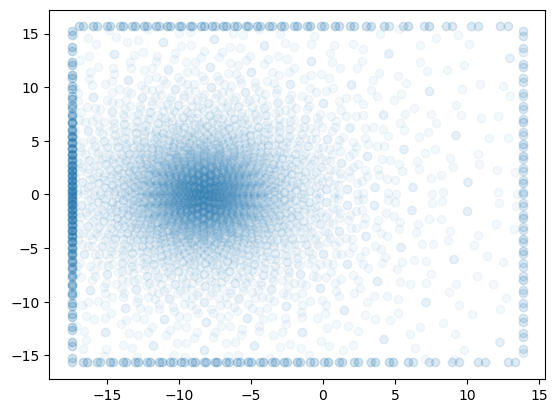

In [2]:
nside = 64
num_int_points = 256 # there're 256 integration points along one line.


poss,dls,nhats = synax.coords.get_healpix_positions(nside=nside,obs_coord = (-8.3,0.,0.006),x_length=20,y_length=20,z_length=5,num_int_points=num_int_points)
plt.scatter(poss[0,::10,200],poss[1,::10,200],alpha=0.05)
poss.shape

Here we illustrate several integration points

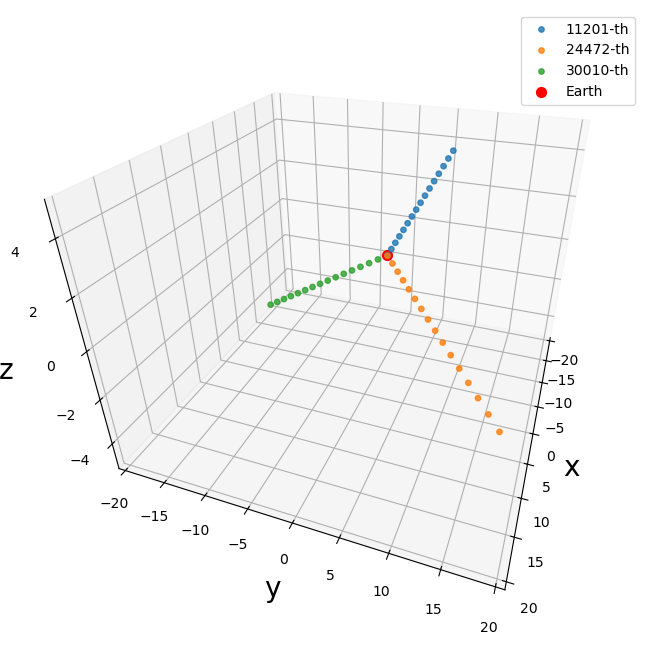

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate some sample data
num_points = 50
idx = 30000
x = poss[0,30000,:256:16]
y = poss[1,30000,:256:16]
z = poss[2,30000,:256:16]

# Create a 3D scatter plot
fig = plt.figure(figsize = (7,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('persp', focal_length=0.2)

idx = 11201
x = poss[0,idx,:256:16]
y = poss[1,idx,:256:16]
z = poss[2,idx,:256:16]
ax.scatter(x, y, z, marker='o',alpha = 0.8,s=15.)

idx = 24472
x = poss[0,idx,:256:16]
y = poss[1,idx,:256:16]
z = poss[2,idx,:256:16]
ax.scatter(x, y, z, marker='o',alpha = 0.8,s=15.)

idx = 30010
x = poss[0,idx,:256:16]
y = poss[1,idx,:256:16]
z = poss[2,idx,:256:16]
ax.scatter(x, y, z, marker='o',alpha = 0.8,s=15.)





ax.scatter(-8.3, 0., 0.006, c='r', marker='o',s=50)

# Set labels for the axes
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20)

ax.set_xlim((-20,20))
ax.set_ylim((-20,20))
ax.set_zlim((-5,5))
# Set title
#ax.set_title('Integration points',fontsize=24)
ax.view_init(30., 20, 0.)
ax.legend(['11201-th','24472-th','30010-th','Earth'])
# Show the plot
plt.subplots_adjust(left=0.5,right=1.0)
plt.tight_layout()
plt.savefig('../figures/integration_points.pdf',dpi=500,bbox_inches='tight')

## Generate integration points for individual sightlines
Of course, you can use lower level api `synax.coords.obtain_positions` to generate integration points for a single sightline.

All you need to provide is the longitude $\theta$ and colattitude $\phi$.

In [4]:

num_int_points = 1024 # there're 256 integration points along one line.
theta = jnp.pi
phi = 0

pos,dl,nhat = synax.coords.obtain_positions(theta,phi,obs_coord = (-8.3,0.,0.006),x_length=20,y_length=20,z_length=5,num_int_points=num_int_points)

Ah ha! We got a straight line.

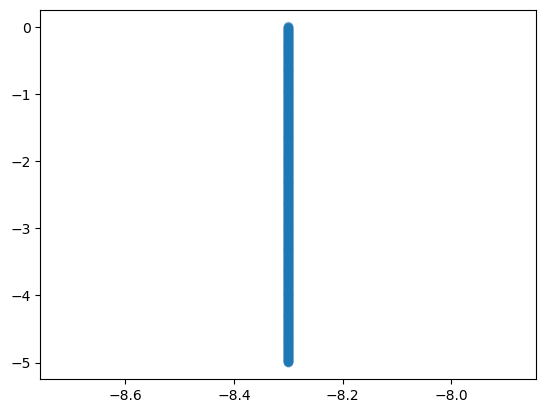

In [6]:
plt.scatter(pos[0],pos[2],alpha=0.3)

You can `jax.vmap` the function and get batched integration positions!

In [9]:
theta = jnp.linspace(0,np.pi,50)# generate some thetas
phi = jnp.linspace(0.2,0.4,50)# generate some phis

obtain_pos_vmap = jax.vmap(lambda theta,phi:synax.coords.obtain_positions(theta,phi))

In [20]:
poss,dls,nhats = obtain_pos_vmap(theta,phi)

Let's show several sightlines

(3, 50, 512)

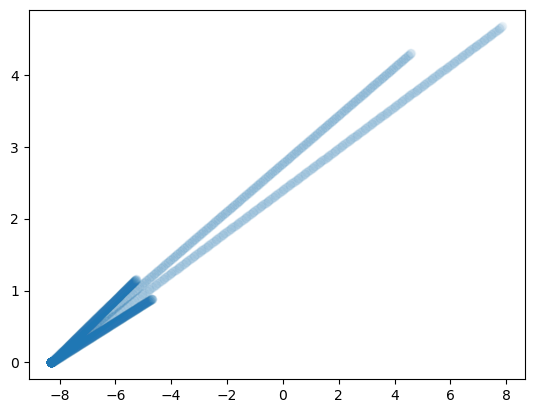

In [21]:
poss = poss.transpose((1,0,2))#notice the shape of the return. the first dimension is the batch dim
plt.scatter(poss[0,::10].reshape(-1),poss[1,::10].reshape(-1),alpha=0.05)
poss.shape

(3, 50, 512)